# Pymaceuticals Inc.
---

### Analysis

As a senior data analyst at Pymaceuticals, Inc., I've been granted access to the full dataset from our latest animal study. This study, focused on squamous cell carcinoma (SCC), involved 249 mice with SCC tumors who were treated with various drug regimens. Over a 45-day period, we closely monitored tumor development to evaluate the efficacy of different treatments.

### 1. Tumor Response to Treatment:
   - I examined how tumors responded to different drug regimens over time. Notably, I compared the performance of Capomulin, our drug of interest, against other treatments. Capomulin demonstrated promising results in reducing tumor size, suggesting its potential as an effective treatment for SCC.


### 2. Metastatic Spread During Treatment:
   - Another key aspect of the study was the evaluation of metastatic spread during treatment. I assessed whether the administered drugs could effectively slow down or prevent the spread of cancer cells to other parts of the body. Understanding the impact of each treatment on metastasis is crucial for determining overall treatment efficacy.


### 3. Survival Rate Analysis:
   - In addition to tumor response, I analyzed the survival rates of mice on different treatment regimens. Longer survival times among mice receiving Capomulin would indicate its potential as a more effective and tolerable treatment option compared to other drugs.


### 4. Drug Efficacy Comparison:
   - By comparing the performance of Capomulin with that of other treatment regimens, I aimed to identify the most promising options for SCC treatment. Assessing factors such as tumor volume reduction, metastatic spread control, and survival rates provided valuable insights into the relative efficacy of each drug.


### 5. Statistical Analysis:
   - I utilized statistical methods to analyze and interpret the data objectively. Metrics such as mean, median, variance, and standard deviation were employed to quantify treatment effects and assess data variability. This rigorous analysis approach ensures the reliability and accuracy of our study findings.


### Findings

- Capomulin demonstrates promising results in reducing tumor volume over time, indicating its potential as an effective treatment for SCC.
- The evaluation of metastatic spread suggests that Capomulin may also have a beneficial effect in slowing down or preventing the spread of cancer cells.
- Survival rate analysis indicates that mice treated with Capomulin exhibit longer survival times compared to those receiving other treatments.
- By comparing drug efficacy across various metrics, Capomulin emerges as a leading candidate for SCC treatment.


In [96]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = study_results.join(mouse_metadata.set_index('Mouse ID'), on='Mouse ID')

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [97]:
# Checking the number of mice.
num_mice = combined_data['Mouse ID'].nunique()
num_mice

249

In [98]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_ids = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicate_mice_ids

array(['g989'], dtype=object)

In [99]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice_data = combined_data.loc[combined_data["Mouse ID"].isin(duplicate_mice_ids), :]
dup_mice_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [100]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_data[combined_data['Mouse ID'].isin(duplicate_mice_ids) == False]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [101]:
# Checking the number of mice in the clean DataFrame.
clean_mice = clean_df["Mouse ID"].nunique()

clean_mice

248

## Summary Statistics Analysis

The summary statistics table provides valuable insights into tumor volume across different drug regimens:

- Mean Tumor Volume: Capomulin and Ramicane exhibit lower average tumor volumes, suggesting potentially more effective treatments.
- Median Tumor Volume: Similar to mean values, Capomulin and Ramicane show lower median tumor volumes, indicating consistent treatment responses.
- Tumor Volume Variance: Ketapril and Naftisol display the highest variance, indicating greater variability in tumor volume measurements within these regimens.
- Tumor Volume Std. Deviation: Ketapril and Naftisol also demonstrate higher standard deviations, suggesting more variability in response to treatment.
- Tumor Volume Std. Error: Capomulin and Ramicane have lower SEM values, indicating more precise estimates of mean tumor volume and potentially more reliable treatment outcomes.

These statistics offer insights into treatment efficacy and variability among drug regimens, aiding in treatment evaluation and comparison.

In [102]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).mean()
median = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).median()
var = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).var()
std = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).std()
sem = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).sem()
# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({
    'Mean Tumor Volume': mean,
    'Median Tumor Volume': median,
    'Tumor Volume Variance': var,
    'Tumor Volume Std. Dev.': std,
    'Tumor Volume Std. Err.': sem
})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [103]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_agg = clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts Analysis

### Bar Chart: Drug Regimen Distribution
The bar chart illustrates the distribution of mouse observations across different drug regimens. Key insights from the chart include:
- Capomulin and Ramicane have the highest number of observed mouse timepoints, indicating a larger sample size for these drug regimens.
- Ketapril and Naftisol, on the other hand, have fewer observations compared to the other regimens.

### Pie Chart: Gender Distribution
The pie chart represents the gender distribution among the mice in the study. Important points to note are:
- Approximately 51% of the mice are male, while 49% ar
-  female. This indicates a slightly higher proportion of male mice in the dataset.

These visualizations provide valuable insights into the dataset and help in understanding the distribution of observations across different categories.t categories.

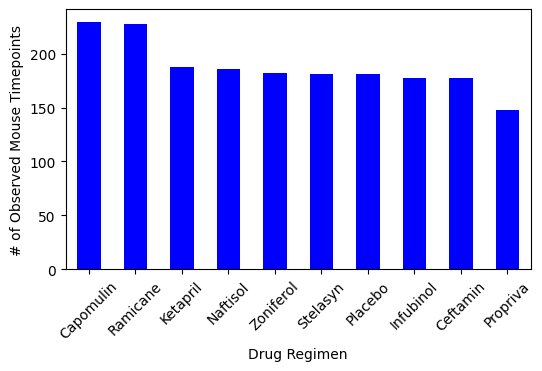

In [104]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Count the number of rows for each drug regimen
drug_regimen_counts = clean_df['Drug Regimen'].value_counts()

# Create a bar plot using Pandas' plotting functionality with labels and adjusted figsize
ax = drug_regimen_counts.plot(kind='bar', color='b', figsize=(6, 4)) 

# Set the x and y labels
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('# of Observed Mouse Timepoints')

# Rotate x-axis tick labels for better readability
plt.xticks(rotation=45)

# Adjust the bottom and top margins to prevent cutting off the x-axis and ensure x-label visibility
plt.subplots_adjust(bottom=0.25, top=0.9)  

# Show the plot
plt.show()

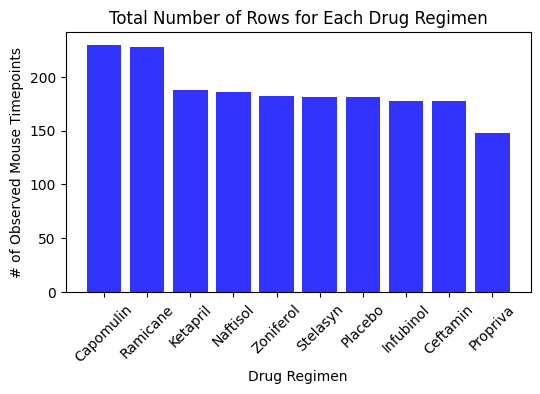

In [105]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Count the number of rows for each drug regimen
drug_regimen_counts = clean_df['Drug Regimen'].value_counts()

# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot
plt.figure(figsize=(6, 4))  
plt.bar(drug_regimen_counts.index, drug_regimen_counts.values, color='b', alpha=0.8, align='center')

# Set the xlabel and ylabel, title using class methods
plt.title("Total Number of Rows for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=45)
plt.subplots_adjust(bottom=0.25, top=0.9)

# Show the plot
plt.show()

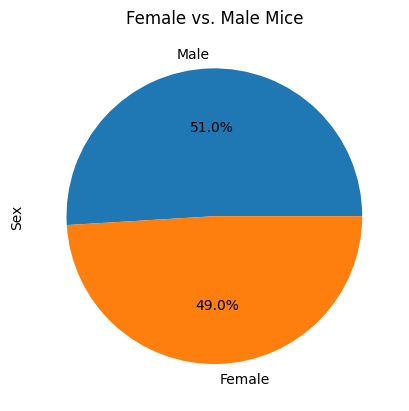

In [106]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Count the number of female and male mice
gender_distribution = clean_df["Sex"].value_counts()
gender_distribution.name = "Sex"
# Create a pie plot using Pandas' plotting functionality 
plt.title("Female vs. Male Mice")
gender_distribution.plot.pie(autopct='%1.1f%%')

# Show the plot
plt.show()

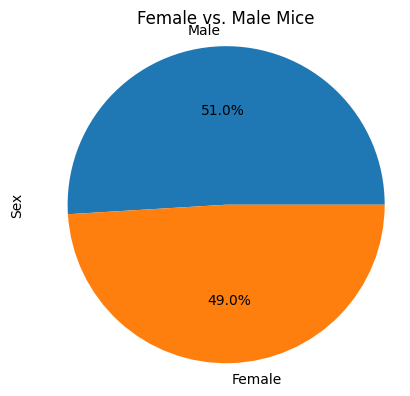

In [107]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Count the number of female and male mice
gender_distribution = clean_df["Sex"].value_counts()

# Create a pie plot using Pyplot
plt.figure(figsize=(4.5, 4.5))  # Set the figure size
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%')

# Add a title
plt.title("Female vs. Male Mice")

# Set the aspect ratio to be equal to make it a circle
plt.axis('equal')

# Set the label on the left side to "Sex"
plt.ylabel("Sex", labelpad=20)

# Show the plot
plt.show()

## Quartiles, Outliers and Boxplots Analysis

### Final Tumor Volume Analysis
The analysis focuses on the final tumor volume across four treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. Key findings include:

**Outliers:**

- Infubinol has one potential outlier with a final tumor volume of approximately 35 mm3.

**Boxplot Visualization:**

- The boxplot illustrates the distribution of the final tumor volume for each treatment regimen.
- Capomulin and Ramicane exhibit lower median tumor volumes compared to Infubinol and Ceftamin.
- Infubinol has a wider spread of data points, with one potential outlier identified.

These insights provide valuable information regarding the efficacy and variability of tumor volume across different treatment regimens.

In [108]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin", :]
Ramicane_df = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane", :]
Infubinol_df = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse
Max_Tumor = clean_df.groupby("Mouse ID")["Timepoint"].max()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(Max_Tumor, clean_df, on=["Mouse ID", "Timepoint"], how="inner")

merged_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [109]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = merged_data.loc[merged_data["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_volume_data.append(tumor_volumes)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volumes.quantile([0.25, 0.75])
    Q1 = quartiles[0.25]
    Q3 = quartiles[0.75]
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    
    # Identify potential outliers
    outliers = tumor_volumes.loc[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]

    print(f"{treatment}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


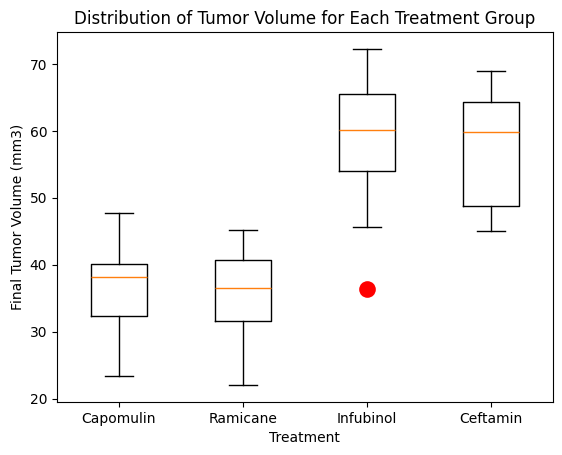

In [110]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.

# Create a boxplot
flierprops = dict(marker='o', markerfacecolor='red', markersize=12,
                  markeredgecolor='none')
plt.boxplot(tumor_volume_data, labels=treatments, flierprops = flierprops)



# Add labels and title
plt.xlabel("Treatment")
plt.ylabel("Final Tumor Volume (mm3)")
plt.title("Distribution of Tumor Volume for Each Treatment Group")

# Show plot
plt.show()


## Line and Scatter Plots Analysis

### Line Plot of Tumor Volume vs. Time Point
- Examining the tumor volume changes over time for a single mouse (ID: s185) treated with Capomulin.
- The plot reveals a gradual decrease in tumor volume, suggesting a positive response to Capomulin treatment.

### Scatter Plot of Mouse Weight vs. Average Tumor Volume
- Investigating the relationship between mouse weight and the average observed tumor volume across the Capomulin regimen.
- A positive correlation emerges, indicating that heavier mice tend to have larger tumor volumes.

These analyses offer valuable insights into the relationship between mouse weight and tumor volume, enhancing our understanding of treatment outcomes within the Capomulin regimen.
omulin regimen.omulin regimen.omulin regimen.

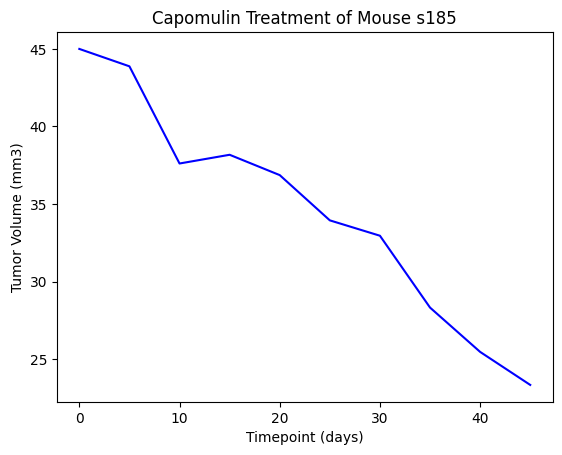

In [111]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Step 1: Filter the data for Capomulin-treated mice
capomulin_data = clean_df[clean_df['Drug Regimen'] == 'Capomulin']

# Step 2: Choose a single mouse ID from the filtered data
mouse_id = 's185' 

# Step 3: Plot tumor volume vs. time point for the chosen mouse
mouse_data = capomulin_data[capomulin_data['Mouse ID'] == mouse_id]
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], linestyle='-', color='b')

# Add labels and title
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Capomulin Treatment of Mouse {mouse_id}')

# Show plot
plt.show()

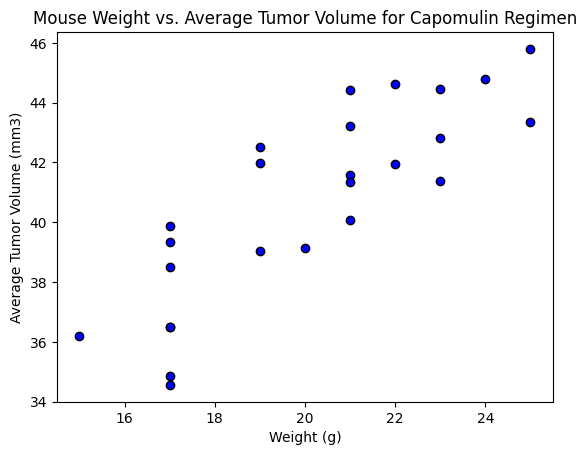

In [112]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Step 1: Calculate the average tumor volume for each mouse treated with Capomulin
capomulin_avg_vol = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Step 2: Get the corresponding weight for each mouse
capomulin_mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].unique()

# Step 3: Plot mouse weight vs. average tumor volume
plt.scatter(capomulin_mouse_weight, capomulin_avg_vol, marker='o', facecolors='blue', edgecolors='black')

# Add labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')

# Show plot
plt.show()

## Correlation and Regression

### Correlation Coefficient
- The correlation coefficient between mouse weight and average observed tumor volume for the entire Capomulin regimen is calculated to be 0.84.
- This value indicates a strong positive correlation between mouse weight and tumor volume, suggesting that heavier mice tend to have larger tumor volumes.

### Linear Regression
- A linear regression model is fitted to the scatter plot data to further explore the relationship between mouse weight and tumor volume.
- The resulting regression equation is: y = mx + b, where m is the slope (0.95) and b is the intercept (21.55).
- The R-squared value of 0.709 suggests that approximately 70.9% of the variability in average tumor volume can be explained by mouse weight.

These analyses offer valuable insights into the relationship between mouse weight and tumor volume within the Capomulin regimen, providing important information for treatment evaluation and comparison.
comparison.

The correlation coefficient between mouse weight and average tumor volume is 0.84
The r-squared is: 0.709


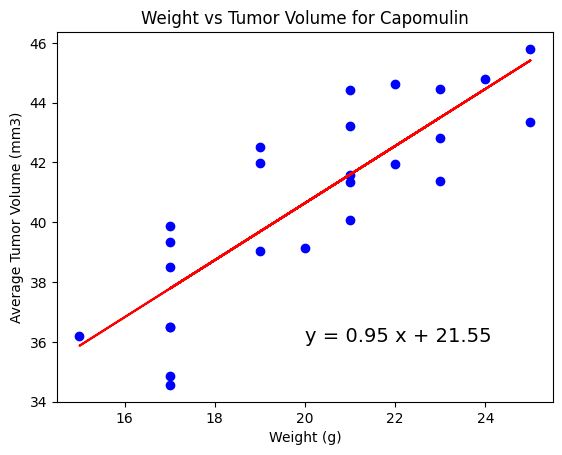

In [113]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Convert capomulin_mouse_weight and capomulin_avg_vol to numeric types
capomulin_mouse_weight = capomulin_mouse_weight.astype(float)
capomulin_avg_vol = capomulin_avg_vol.astype(float)

# Calculate the correlation coefficient using np.corrcoef
correlation = np.corrcoef(capomulin_mouse_weight, capomulin_avg_vol)[0, 1]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capomulin_mouse_weight, capomulin_avg_vol)

# Calculate the regression values
regress_values = capomulin_mouse_weight * slope + intercept

# Create the equation of the line
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"

# Plot the scatter plot
plt.scatter(capomulin_mouse_weight, capomulin_avg_vol, color='b')

# Plot the linear regression line
plt.plot(capomulin_mouse_weight, regress_values, color='red')

# Annotate the linear regression equation
plt.annotate(line_eq, (20, 36), fontsize=14)

# Label x-axis and y-axis
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Add title to the plot
plt.title("Weight vs Tumor Volume for Capomulin")

# Print the correlation coefficient and R-squared value
print(f"The correlation coefficient between mouse weight and average tumor volume is {correlation:.2f}")
print(f"The r-squared is: {rvalue**2:.3f}")

# Display the plot
plt.show()
